In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Here we will be reviewing the "2017 Physicsan and Other Suplier Reimbursement" dataset. 
Our goal here is to identify and visualize the variance in oncology related payments and utilization across a few different variables.
At a minimum:
  - HCPCS code
  - Physicians and/or providers
  - geography (States and Regions)
We will start with a quick review of the data to check its characteristics and see if there are any adjustments to make to ensure data quality
and correct any issues that come up win uploading. To some extent, we need to trust that the data is complete and accurately reported. We will be checking mostly to see any nan values that will interupt our analysis (such as missing States) or unexpected data types (like payment amounts
reported as strings intead of numerics). We will also look at some basic stats of the data (mean, std, and the like)

In [2]:
path = 'C://Users//Taylor//Documents//ProgramsAndScripts//MedicareProject//Medicare_Provider_Util_Payment_PUF_CY2017//Medicare_Provider_Util_Payment_PUF_CY2017.txt'

In [3]:
df = pd.read_table(path, low_memory = False)
df.drop(0, inplace = True) #from looking at the data set, I know that I need to drop the first row because it is copyright information

In [4]:
df.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
1,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99217,Hospital observation care discharge,N,100.0,96.0,100.0,73.398800,325.780000,56.827200,57.492400
2,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99218,Hospital observation care typically 30 minutes,N,26.0,25.0,26.0,100.080000,449.000000,78.460000,79.306154
3,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99219,Hospital observation care typically 50 minutes,N,52.0,51.0,52.0,136.380000,614.000000,102.807692,103.895385
4,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99220,Hospital observation care typically 70 minutes...,N,59.0,59.0,59.0,190.363729,755.932203,141.293559,142.865763
5,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99221,"Initial hospital inpatient care, typically 30 ...",N,16.0,16.0,16.0,101.680000,462.812500,79.710000,80.750000


In [5]:
df.tail()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
9847439,1992999825,DESCHENES,GEOFFREY,R,M.D.,M,I,1100 9TH AVE,MS:M4-PFS,SEATTLE,...,99214,Established patient office or other outpatient...,N,248.0,175.0,248.0,116.86,345.0,85.637177,80.263065
9847440,1992999874,JOFFE,GABRIELLA,NaN,NaN,F,I,8260 ATLEE RD,"MOB 2, SUITE 319",MECHANICSVILLE,...,99223,"Initial hospital inpatient care, typically 70 ...",N,41.0,41.0,41.0,203.40,496.0,225.564634,155.800732
9847441,1992999874,JOFFE,GABRIELLA,NaN,NaN,F,I,8260 ATLEE RD,"MOB 2, SUITE 319",MECHANICSVILLE,...,99232,"Subsequent hospital inpatient care, typically ...",N,101.0,57.0,101.0,72.48,176.0,83.200000,57.390000
9847442,1992999874,JOFFE,GABRIELLA,NaN,NaN,F,I,8260 ATLEE RD,"MOB 2, SUITE 319",MECHANICSVILLE,...,99233,"Subsequent hospital inpatient care, typically ...",N,102.0,55.0,102.0,104.76,254.0,119.450784,82.450490
9847443,1992999874,JOFFE,GABRIELLA,NaN,NaN,F,I,8260 ATLEE RD,"MOB 2, SUITE 319",MECHANICSVILLE,...,99239,"Hospital discharge day management, more than 3...",N,49.0,49.0,49.0,107.98,262.0,123.950000,85.540000


In [6]:
df.info() #columns 19-25 are all float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9847443 entries, 1 to 9847443
Data columns (total 26 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   npi                               int64  
 1   nppes_provider_last_org_name      object 
 2   nppes_provider_first_name         object 
 3   nppes_provider_mi                 object 
 4   nppes_credentials                 object 
 5   nppes_provider_gender             object 
 6   nppes_entity_code                 object 
 7   nppes_provider_street1            object 
 8   nppes_provider_street2            object 
 9   nppes_provider_city               object 
 10  nppes_provider_zip                object 
 11  nppes_provider_state              object 
 12  nppes_provider_country            object 
 13  provider_type                     object 
 14  medicare_participation_indicator  object 
 15  place_of_service                  object 
 16  hcpcs_code                        ob

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
npi,9847443.0,1.499840e+09,2.877160e+08,1.003000e+09,1.255301e+09,1.497985e+09,1.740675e+09,1.993000e+09
line_srvc_cnt,9847443.0,2.448553e+02,5.122602e+03,2.400000e+00,2.100000e+01,4.300000e+01,1.170000e+02,7.195536e+06
bene_unique_cnt,9847443.0,8.777250e+01,1.167731e+03,1.100000e+01,1.700000e+01,3.200000e+01,7.500000e+01,7.928730e+05
bene_day_srvc_cnt,9847443.0,1.403349e+02,1.985972e+03,1.100000e+01,2.000000e+01,4.000000e+01,1.060000e+02,1.504215e+06
average_Medicare_allowed_amt,9847443.0,1.015993e+02,2.764955e+02,6.035380e-05,2.426084e+01,6.499769e+01,1.135045e+02,5.668435e+04
average_submitted_chrg_amt,9847443.0,3.515861e+02,1.064216e+03,6.035380e-05,5.800000e+01,1.460000e+02,3.000000e+02,9.999999e+04
average_Medicare_payment_amt,9847443.0,7.753480e+01,2.152963e+02,0.000000e+00,1.928420e+01,4.695941e+01,8.519500e+01,4.443910e+04
average_Medicare_standard_amt,9847443.0,7.822188e+01,2.158862e+02,0.000000e+00,2.009083e+01,4.775953e+01,8.525000e+01,4.443910e+04


Refrencing the data sheet, columns 0-19 are all identify the provider (giving us its demograhpic immigration and such). Likes 19-25 are all numeric values that provide details on the number of services provided, number of beneficiaries and then the charges the the provider charged, submitted and that medicare paid.

The only detail here that is sort of alarming is that the min line_srvc_cnt (number of services provided) is 2.4 and it doesn't make much sense that this could be fractional. I guess its possible that some providers or services have some weird mentric by which they count this (the data dictionary mentions that the counting metric varies by service).

One other thing that stands out is that the maximum average submitted amount is 9.99999*10^4. There might be a provider that had only 1 or 2 Medicare services for some very expensive service and that might be the maximum charge one can submitt to Medicare.

Its also interesting that the maximum paid amount and maximum standardized amount (the final ines in the describe table) are the same. Standardization seems to remove geographic variation in payments so its easier to comparie provider practices and beneficaries habits. Whoever got the max payment is probably in the region that the other regions are standarized too.

Next, we should review any NANs that exist in the Dataset so we can understand why they exist. We saw some  of them head and tail of the data set. 

In [8]:
df.isna().sum()

npi                                       0
nppes_provider_last_org_name            146
nppes_provider_first_name            431421
nppes_provider_mi                   2907476
nppes_credentials                    732460
nppes_provider_gender                431318
nppes_entity_code                         0
nppes_provider_street1                    6
nppes_provider_street2              5858230
nppes_provider_city                       2
nppes_provider_zip                        2
nppes_provider_state                      0
nppes_provider_country                    0
provider_type                             0
medicare_participation_indicator          0
place_of_service                          0
hcpcs_code                                0
hcpcs_description                         0
hcpcs_drug_indicator                      0
line_srvc_cnt                             0
bene_unique_cnt                           0
bene_day_srvc_cnt                         0
average_Medicare_allowed_amt    

Many of these being NA is fine. Many of these (first name, middle initial, gender, credentials) are always blank for organizations. Not all providers (even individuals) will have middle names or credentials and not all addresses have second lines. ITs probably safe to assume that the NAs in these columns are intentionally blank. More concerning are the NA values in last/orgname, street address 1, city, and zip

In [9]:
df[df['nppes_provider_city'].isna()]

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
3139278,1316958416,PATTERSON,PRISCILLA,NaN,CRNA,F,I,NaN,NaN,NaN,...,00740,Anesthesia for procedure on gastrointestinal t...,N,12.0,12.0,12.0,86.358333,775.833333,67.705833,67.262500
3139279,1316958416,PATTERSON,PRISCILLA,NaN,CRNA,F,I,NaN,NaN,NaN,...,00790,Anesthesia for procedure in upper abdomen incl...,N,12.0,12.0,12.0,171.419167,1504.166667,134.391667,133.516667


In [10]:
df[df['nppes_provider_zip'].isna()]

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
5804176,1588870349,WIXSON,SANDRA,J,PH.D.,F,I,"ROTUNDA 8, CASA # 163",ULLOA,ULLOA,...,90791,Psychiatric diagnostic evaluation,N,20.0,19.0,20.0,129.860000,150.000000,100.772000,102.511500
5804177,1588870349,WIXSON,SANDRA,J,PH.D.,F,I,"ROTUNDA 8, CASA # 163",ULLOA,ULLOA,...,90837,"Psychotherapy, 60 minutes",N,254.0,23.0,253.0,125.303937,154.173228,96.957008,98.780039


In [11]:
df[df['nppes_provider_street1'].isna()]

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
3139278,1316958416,PATTERSON,PRISCILLA,NaN,CRNA,F,I,NaN,NaN,NaN,...,00740,Anesthesia for procedure on gastrointestinal t...,N,12.0,12.0,12.0,86.358333,775.833333,67.705833,67.262500
3139279,1316958416,PATTERSON,PRISCILLA,NaN,CRNA,F,I,NaN,NaN,NaN,...,00790,Anesthesia for procedure in upper abdomen incl...,N,12.0,12.0,12.0,171.419167,1504.166667,134.391667,133.516667
8467642,1851757348,ATAR,LAURA,M,NaN,F,I,NaN,NaN,SARNIA,...,81002,"Urinalysis, manual test",N,19.0,16.0,19.0,3.500000,7.000000,3.430000,3.430000
8467643,1851757348,ATAR,LAURA,M,NaN,F,I,NaN,NaN,SARNIA,...,99212,Established patient office or other outpatient...,N,29.0,16.0,29.0,47.870000,97.000000,34.442759,31.633103
8467644,1851757348,ATAR,LAURA,M,NaN,F,I,NaN,NaN,SARNIA,...,99213,Established patient office or other outpatient...,N,51.0,38.0,51.0,79.630000,161.000000,57.364118,53.244706
8467645,1851757348,ATAR,LAURA,M,NaN,F,I,NaN,NaN,SARNIA,...,99214,Established patient office or other outpatient...,N,16.0,15.0,16.0,116.860000,237.000000,91.620000,85.250000


In [12]:
df[df['nppes_provider_last_org_name'].isna()]

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
614578,1063454130,NaN,BENJAMIN,H,O.D.,M,I,3191 CROW CANYON PL,SUITE C,SAN RAMON,...,92014,Eye and medical examination for diagnosis and ...,N,48.0,48.0,48.0,143.420000,160.00,94.729375,84.325000
614579,1063454130,NaN,BENJAMIN,H,O.D.,M,I,3191 CROW CANYON PL,SUITE C,SAN RAMON,...,92250,Photography of the retina,N,35.0,30.0,35.0,79.789143,179.00,58.007429,50.174286
614580,1063454130,NaN,BENJAMIN,H,O.D.,M,I,3191 CROW CANYON PL,SUITE C,SAN RAMON,...,99213,Established patient office or other outpatient...,N,78.0,34.0,78.0,82.226154,99.00,60.187308,55.520769
790583,1083084875,NaN,TRAVIS,J,FNP,M,I,1607 E US HIGHWAY 136,NaN,ALBANY,...,99308,"Subsequent nursing facility visit, typically 1...",N,12.0,12.0,12.0,56.300000,117.25,36.783333,39.170833
1085480,1114025665,NaN,TERRY,N,OD,M,I,9650 E WASHINGTON ST,NaN,INDPLS,...,83516,Analysis of substance using immunoassay technique,N,52.0,23.0,26.0,15.820000,45.00,15.500000,15.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8427650,1851440127,NaN,SONG,H,M.D.,M,I,4995 FRIENDSHIP RD,SUITE A,BUFORD,...,J3420,"Injection, vitamin b-12 cyanocobalamin, up to ...",Y,363.0,190.0,363.0,3.001157,20.00,1.961157,1.961157
9256364,1932547866,NaN,ROBERT,C,MD,M,I,1195 BOYSON RD STE 200,NaN,HIAWATHA,...,92012,Eye and medical examination for diagnosis and ...,N,48.0,45.0,48.0,83.020000,220.00,64.142292,68.172917
9256365,1932547866,NaN,ROBERT,C,MD,M,I,1195 BOYSON RD STE 200,NaN,HIAWATHA,...,92014,Eye and medical examination for diagnosis and ...,N,29.0,29.0,29.0,120.440000,321.00,81.099655,84.943448
9256366,1932547866,NaN,ROBERT,C,MD,M,I,1195 BOYSON RD STE 200,NaN,HIAWATHA,...,92020,Examination of cornea and iris using lens devi...,N,12.0,12.0,12.0,26.370000,74.00,18.956667,19.681667


In [13]:
df[df['nppes_provider_last_org_name'].isna()]['nppes_entity_code'].unique()

array(['I'], dtype=object)

In [14]:
df.groupby('nppes_entity_code').count()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,...,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
nppes_entity_code,,,,,,,,,,,,,,,,,,,,,
I,9416125,9415979,9416022,6939967,9114983,9416125,9416119,3896342,9416123,9416123,...,9416125,9416125,9416125,9416125,9416125,9416125,9416125,9416125,9416125,9416125
O,431318,431318,0,0,0,0,431318,92871,431318,431318,...,431318,431318,431318,431318,431318,431318,431318,431318,431318,431318


Judging by the numbers in the tables generated here and what we can see from the rows with missing values, it seems that the organizations that have missing values have simply not reported information not relevant to them (ie things like gendr, credentials, and middle initial were left intentionally blank) and individuals have made errors when report, had deliberate omissions of, or did not have certain information. As previously stated, many individuals may lack a middle initial (or think it is unimportant). Some people may have forgotten to include their last name or street address.

Since these are all just identifying information that shouldn't affect our analysis and none of these will be used in any sort of model creation, we will leave them as is. If need be, we can later fill them in with an blank string or another approriate value.

As a final over view of the data, it would be nice to make a pairplot to check the dependencies of the numberic variables, but the dataset is a bit too large to run that over the full thing. Instead we will select a few of the varaibles that (based on the  data dictionary) seem likely to interesting dependencies and run a pair plot on those varaibles through the oncology related payments.

In [15]:
numerics = ['line_srvc_cnt', 'average_submitted_chrg_amt', 'average_Medicare_payment_amt']


In [16]:
reg_con = 'J9\d\d\d'
df_onc = df[df['hcpcs_code'].str.match(reg_con)].copy()

In [17]:
df_onc.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
351,1003002072,GOTESMAN,ALEXANDER,NaN,M.D.,M,I,1374 WHITEHORSE HAMILTON SQUARE RD,NaN,HAMILTON,...,J9217,"Leuprolide acetate (for depot suspension), 7.5 mg",Y,81.0,20.0,26.0,213.740494,1000.000000,165.800000,165.800000
442,1003002312,HOPKINS,PATRICIA,T,M.D.,F,I,500 CONGRESS ST STE 1B,NaN,QUINCY,...,J9250,"Methotrexate sodium, 5 mg",Y,2547.0,55.0,511.0,0.259898,5.000982,0.199698,0.200620
2153,1003013392,RATCHFORD,ERIK,M,D.O.,M,I,"245 CHERRY ST SE,",SUITE 202,GRAND RAPIDS,...,J9217,"Leuprolide acetate (for depot suspension), 7.5 mg",Y,114.0,18.0,28.0,211.210965,277.850000,164.261491,164.261491
3625,1003019019,DUDNEY,BLONIE,W,MD,M,I,1224 GRAHAM RD,3011,FLORISSANT,...,J9035,"Injection, bevacizumab, 10 mg",Y,106.0,59.0,92.0,74.388679,84.622642,57.561415,58.270660
4687,1003025875,DAVOL,PATRICK,E,M.D.,M,I,2510 NW EDENBOWER BLVD,SUITE 146,ROSEBURG,...,J9217,"Leuprolide acetate (for depot suspension), 7.5 mg",Y,177.0,34.0,60.0,214.657684,359.186441,164.429831,165.554294


In [18]:
len(df_onc)

21217

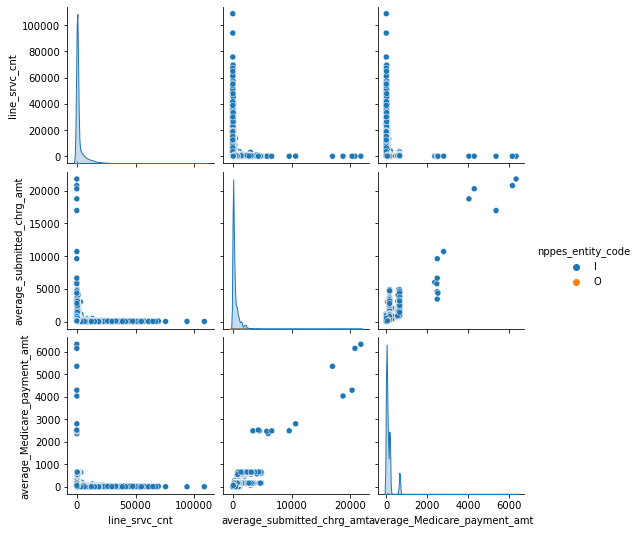

In [19]:
sns.pairplot(data=df_onc, hue = 'nppes_entity_code', vars = numerics)

In [21]:
df_onc.groupby('nppes_entity_code').count()['npi']

nppes_entity_code
I    21169
O       48
Name: npi, dtype: int64

A few things we can see about Oncology related data:
 - I am shocked at how few organizations provide oncology related treatment. Its not even one organization per state. 
 - There is almost a linear (maybe quadratic or sqrt depending on which axis is X and which is Y) relationship beetween the average medicare charge submitted and the average medicare payment. Intuitively, this makes sense. The more a providoer charges medicare, the more medicare pays out, up to a certain limit anyway
 - The most stark detail here is maybe the seperation between high cost providoers and high medicare patient providers. Its not just that there is an anti-correleation (ie charge more and get fewer patients), but that if a provider charges too much, patients avoid that provider. However since the data set is technically grouped by service rather than provider, it could be that more expensive services are needed much more rarely.

Part 2 - Data Analysis
1. identify the top 5 physicians (NPI) in the state of New York by total antineoplastic treatment Medicare payments received in 2017.

In [74]:
#The first step to doing this is finding the total payments recieved for each provider. FIrst we find this for each serviceby multiplying
#the number of services provided and the average Medicare payment for each service
df_onc['total_Medicare_payment_rec'] = df_onc['line_srvc_cnt']*df_onc['average_Medicare_payment_amt']
df_onc.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,total_Medicare_payment_rec
351,1003002072,GOTESMAN,ALEXANDER,NaN,M.D.,M,I,1374 WHITEHORSE HAMILTON SQUARE RD,NaN,HAMILTON,...,"Leuprolide acetate (for depot suspension), 7.5 mg",Y,81.0,20.0,26.0,213.740494,1000.000000,165.800000,165.800000,13429.80
442,1003002312,HOPKINS,PATRICIA,T,M.D.,F,I,500 CONGRESS ST STE 1B,NaN,QUINCY,...,"Methotrexate sodium, 5 mg",Y,2547.0,55.0,511.0,0.259898,5.000982,0.199698,0.200620,508.63
2153,1003013392,RATCHFORD,ERIK,M,D.O.,M,I,"245 CHERRY ST SE,",SUITE 202,GRAND RAPIDS,...,"Leuprolide acetate (for depot suspension), 7.5 mg",Y,114.0,18.0,28.0,211.210965,277.850000,164.261491,164.261491,18725.81
3625,1003019019,DUDNEY,BLONIE,W,MD,M,I,1224 GRAHAM RD,3011,FLORISSANT,...,"Injection, bevacizumab, 10 mg",Y,106.0,59.0,92.0,74.388679,84.622642,57.561415,58.270660,6101.51
4687,1003025875,DAVOL,PATRICK,E,M.D.,M,I,2510 NW EDENBOWER BLVD,SUITE 146,ROSEBURG,...,"Leuprolide acetate (for depot suspension), 7.5 mg",Y,177.0,34.0,60.0,214.657684,359.186441,164.429831,165.554294,29104.08


In [75]:
#Now we can group by the NPI and sum this total payment recieved and sort this by that sum, only selecting providers from NY
df_ny = df_onc[df_onc['nppes_provider_state'].str.match('NY')].copy()
df_ny.groupby('npi').sum().sort_values(by = 'total_Medicare_payment_rec', ascending= False).head()

,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,total_Medicare_payment_rec
npi,,,,,,,,
1710074885,60241.0,108.0,715.0,150.897610,266.306519,117.086889,118.643608,1.931755e+06
1447230420,91217.0,474.0,1351.0,1576.936303,5241.671385,1230.649768,1233.982236,1.891867e+06
1386847721,44122.0,91.0,550.0,127.121463,236.541204,99.422300,99.716825,1.423728e+06
1710204573,58168.0,389.0,807.0,1574.164190,5174.172411,1229.294902,1231.508917,1.370489e+06
1518057785,43524.0,116.0,492.0,150.765089,265.389249,117.143028,118.494396,1.347367e+06


In [76]:
#This array is the list of our top 5 providers by medicare payments recieved
top_5 = df_ny.groupby('npi').sum().sort_values(by = 'total_Medicare_payment_rec', ascending= False).head().index.array
top_5

<PandasArray>
[1710074885, 1447230420, 1386847721, 1710204573, 1518057785]
Length: 5, dtype: int64

In [77]:
#This is a new dataframe that only had info from the top 5
df_top5 = df_ny[df_ny['npi'].isin(top_5)]

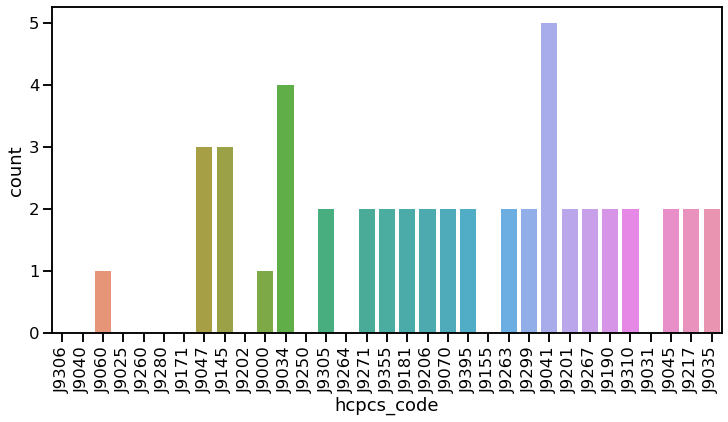

In [78]:
#First, lets compar the top 5 earns to everyone else in terms of services provided. The order is based on most common HCPCS codes for the full
#set of providers in NY
with sns.plotting_context("talk"):
    plt.figure(figsize = (12,6))
    sns.countplot(data = df_top5, x = 'hcpcs_code', order = df_ny.groupby('hcpcs_code').count().sort_values(by = 'npi').index)
    plt.xticks(rotation=90)

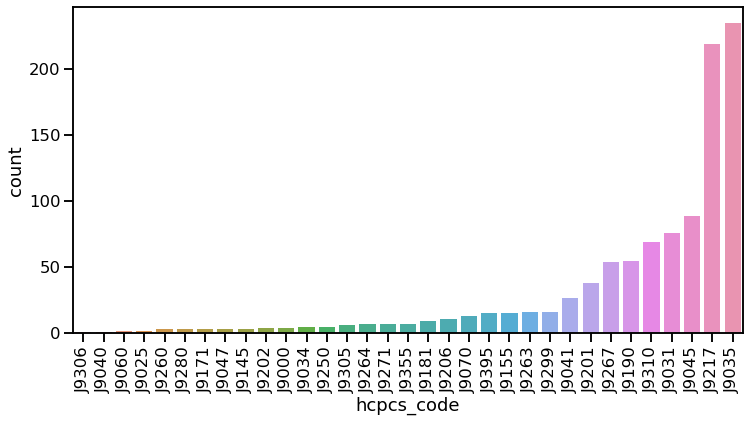

In [84]:
#How does this same plot look for all NY providers (order is same as above)
with sns.plotting_context("talk"):
    plt.figure(figsize = (12,6))
    sns.countplot(data = df_ny, x = 'hcpcs_code',order = df_ny.groupby('hcpcs_code').count().sort_values(by = 'npi').index)
    plt.xticks(rotation=90)

In [81]:
#Lets check where the top 5 are located
df_top5['nppes_provider_city'].unique()

array(['NEW YORK', 'EAST SYRACUSE'], dtype=object)

In [83]:
#How many other providers are in these areas?
df_ny.groupby('nppes_provider_city').count().loc[['NEW YORK', 'EAST SYRACUSE']]['npi']

nppes_provider_city
NEW YORK         131
EAST SYRACUSE    106
Name: npi, dtype: int64

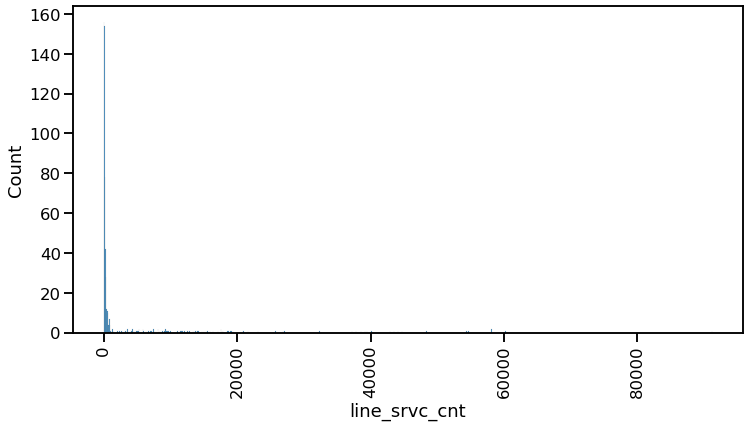

In [85]:
#Are the top 5 unique in the number of services they provide

data = df_ny.groupby('npi').sum().sort_values(by = 'line_srvc_cnt', ascending= False)
with sns.plotting_context("talk"):
    plt.figure(figsize = (12,6))
    sns.histplot(data = data, x = 'line_srvc_cnt')
    plt.xticks(rotation=90)

In [86]:
#Is the average of the average charge amount higher or lower for the top5 than the rest of the providers?
df_mean = df_ny.groupby('npi').mean()
df_mean.loc[top_5][['average_submitted_chrg_amt', 'average_Medicare_payment_amt']]

,average_submitted_chrg_amt,average_Medicare_payment_amt
npi,,
1710074885,66.576630,29.271722
1447230420,262.083569,61.532488
1386847721,78.847068,33.140767
1710204573,287.454023,68.294161
1518057785,66.347312,29.285757


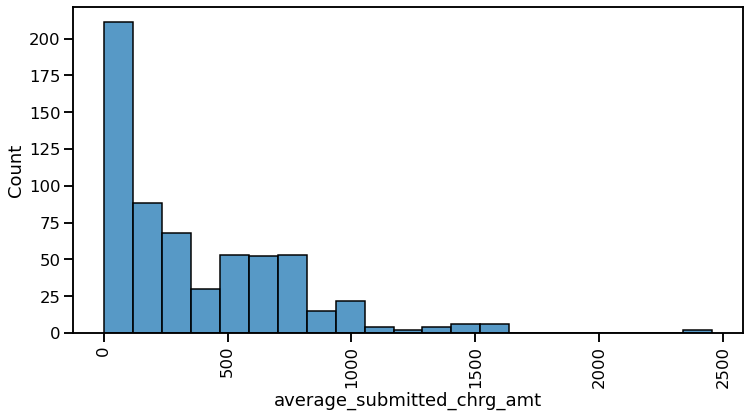

In [87]:
#What is the submitted charge amount distribution for the full NY data set?
with sns.plotting_context("talk"):
    plt.figure(figsize = (12,6))
    sns.histplot(data = df_mean, x = 'average_submitted_chrg_amt')
    plt.xticks(rotation=90)

Reviewing what we have looked at here, we can see that:
The top 5 service providers are NPI codes: 1710074885, 1447230420, 1386847721, 1710204573, 1518057785
- There is no major difference in location that sets the top 5 apart from the rest of the data set. They are all in NYC or East Syracuse and there are many other providers in that area. Nor is there a big difference in what they charge vs what other providers charge for their services on average.
- They are somewhat set apart being the services they provide, being more likely to provide less common services than the other providers. In particular, most of them provide J9037, J9045, and J9034, which are provided by very few other NY providers
- The biggest difference is in how many services they provided. Each of them provided over 40k different services, while most providers offered fewer than 20k services

Part 2 - Data Analysis

    2. Using solely the dataset you created in Part 1, please identify the
    top 3 antineoplastic treatment “HCPCS Codes” by average services received per patient
    for the United States in 2017. 
        Did you need to make any assumptions for this calculationto be valid? 
        Based on your findings for the top 3 codes, do you think this is a good metric? 
        Explain why or why not.

In [71]:
#There are two steps to making this. FIrst sum the unique beneficiares (number of patients) and services provided for each hcpcs code
df_hcps = df_onc.groupby('hcpcs_code').sum()
df_hcps.head()

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,total_Medicare_payment_rec
hcpcs_code,,,,,,,,,
J9000,166713562879,24266.0,1474.0,2994.0,362.978722,4105.829106,281.953583,284.403055,6.072749e+04
J9025,393450724057,4527221.0,3869.0,24414.0,546.268134,3005.252504,426.369580,428.008579,7.391740e+06
J9031,1811024870267,68597.0,20564.0,68568.0,155876.400002,334643.110278,118959.785729,120097.606128,6.744626e+06
J9034,97292369462,361424.0,841.0,2289.0,1603.783677,3720.891037,1254.080111,1257.342199,6.671590e+06
J9035,4068742372446,3063478.1,213947.0,749347.0,197613.852993,395297.938181,150842.696069,152448.575134,1.745663e+08


In [73]:
#Now we divide the number of services for each HCPCS code by the number beneficiaries for that code to get the average services per patient
#for each HCPCS code.
def divide(a,b):
    return a/b
df_hcps['srvc_per_bene'] = np.vectorize(divide)(df_hcps['line_srvc_cnt'], df_hcps['bene_unique_cnt'])
df_hcps.sort_values(by = 'srvc_per_bene', ascending = False).head(3) 

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,total_Medicare_payment_rec,srvc_per_bene
hcpcs_code,,,,,,,,,,
J9306,1184692964,36540.0,14.0,81.0,11.038966,30.000000,8.654545,8.654545,3.162371e+05,2610.000000
J9025,393450724057,4527221.0,3869.0,24414.0,546.268134,3005.252504,426.369580,428.008579,7.391740e+06,1170.126906
J9299,1012053587705,11150299.0,10707.0,48001.0,17745.047144,41498.658137,13796.195000,13935.272932,2.276027e+08,1041.402727


The top 3 HPCS codes by average services recieved per patient are J9306, j9025 and J9299.
As far as assumptions go I think there are two major ones
 1. Throughout this whole analysis we assume that this data set has been accurately reported. Providers are incentivized to accurately report this information both because they pay depends on it and deliberately falsifying records like this is probably illegal. Its probably reasonable to assume the data is accurate and, as analysts, we need to assume this to make any useful conclusions from the data. This data set in particular only has a few omissions in identifying information (which are all reasonable or unimportant) and no omissions in the more important npi or numeric information, so there are no major issues.
 
 2. The other assumption is that the different kinds of treatments are actually comprable in this way. To elborate, Not all treatments are one time deals where you enter a hospital or doctor's office and get a shot or something. Some of them are require more time and comittment (taking pills over weeks or even months at a time or even getting constant care in a hospital). It doesn't seem clear to me that there is a line  we draw a constant treatment regimen into distinct treatment. J9306 might be a treatment that requires these 14 people to be under constant care into distinct 'treaments' (as counted in line_srvc_cnt) might be whatever some beurocrat thought was reasonable. 
 
    To trust this metric, we need to trust that whoever divides long term care does so in a way that makes it comprable to one time treatments. Before I trusted this metric, I would probably want to know the logic behind these divisions, however the institutions that release these data sets have (in the time they have been compiling and releasing this data) likely come up with reasonable methodologies to divided different treatments to keep the entries in the dataset comprable to one another. Therefore, trusting the metric is probably fair

Part 2 - Data Analysis

    3.We are interested to know if on average, treating more diabetic patients will result in
    higher total payments reimbursed from Medicare for antineoplastic treatment. Using all
    publicly available data in our data dictionary, not solely the Detailed Data File, how
    would you answer this question?

The way I would do this is to use the HPCS code to create two tables: 1 that includes providers who do antineoplastic treatment and no diabetic treatement and another that in includes only providers who do both antineoplastic treatemnt and diabetic treatment. Each table will only include information on the antineoplastic treatments given by the providers.  For each table, we can find the total medicare payment per provider and then sum that up to find the total medicare payment for the two provider sets. If the reimbursement for the set that treats diabetic patients is higher than the set that doesn't, then treating diabetic patients more than likely increases Medicare reimbursements for antineoplastic treatment.

Part 3 - Self-directed Data Visualization


Which HPCS code and which regions offer the highest returns and largest consumer base

- payout differences for HPCS codes - bar
    - show most profitable codes
- number of bene for HPCS codes - bar
    - show how we maximize our consumer base
- Geographic differnces in standardized payout - map or barplot
    - states with highest earning potential
- Things missing/future work
    - Which codes most commonly utilized in each state
    - costs of business in each state - proper registration, taxes, etc

The goal of the plots below here is to give a very basic overview of HCPCS and STATE organized data THere are, of course other visualizations we can produce that could give a better understanding of STATE and HCPCS level trends, but these 3 make a nice introduction upon which one can build a deeper investigation. We can't really build that here due to time (90 minutes to build the presentation) and figure constrants (only 3 plots are allowed). 

In [96]:
hpcs_mean = df_onc.groupby('hcpcs_code').mean().sort_values(by = 'average_Medicare_payment_amt', ascending= True)
hpcs_mean.head()

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,total_Medicare_payment_rec
hcpcs_code,,,,,,,,,
J9267,1.501437e+09,9669.446466,18.995101,66.235129,0.149030,4.955482,0.115286,0.116339,1117.844360
J9263,1.498072e+09,14731.322896,14.645793,46.375734,0.239325,19.015606,0.184981,0.187307,2737.957945
J9250,1.507348e+09,1065.047794,32.323529,294.000000,0.259746,6.985279,0.196366,0.197840,208.483824
J9181,1.471350e+09,698.410526,14.754386,41.694737,0.573021,11.591450,0.443401,0.448641,309.165333
J9190,1.491166e+09,515.177977,17.845768,70.022956,1.698491,12.300358,1.313928,1.325538,679.030115


In [94]:
hpcs_sum = df_onc.groupby('hcpcs_code').sum().sort_values(by = 'line_srvc_cnt', ascending= True)
hpcs_sum.head()

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,total_Medicare_payment_rec
hcpcs_code,,,,,,,,,
J9040,5688318606,99.0,64.0,96.0,155.056196,222.782353,118.269667,118.269667,3013.790000
J9225,12196425988,151.0,151.0,151.0,25510.637487,44841.589396,19797.181003,19961.855213,373543.080002
J9390,4210444673,471.0,38.0,173.0,26.629189,235.000000,20.648714,20.940979,3231.930000
J9370,29639816585,892.0,237.0,498.0,88.987440,894.376648,69.370309,69.599796,3262.660000
J9208,2734083011,974.0,32.0,474.0,55.340105,342.259509,43.385908,43.385908,21046.240000


In [101]:
state_mean = df_onc.groupby('nppes_provider_state').mean().sort_values(by = 'average_Medicare_standard_amt', ascending = True)
state_mean.head()

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,total_Medicare_payment_rec
nppes_provider_state,,,,,,,,,
AE,1.558536e+09,218.000000,111.000000,179.000000,74.905459,85.000000,58.541330,58.541330,12762.010000
VT,1.528080e+09,3792.520000,28.680000,101.000000,93.222566,117.429777,72.261823,72.850236,84005.236000
OK,1.453535e+09,2460.806490,35.644231,93.050481,98.109311,231.762346,75.585311,76.584303,47765.462885
MN,1.479123e+09,966.150838,27.226257,69.016760,101.603214,225.886573,78.132611,79.028085,23324.486201
ND,1.712597e+09,7724.296296,23.851852,95.703704,102.153859,184.324723,79.209815,79.639518,148526.721482


In [92]:
state_sum = df_onc.groupby('nppes_provider_state').sum().sort_values(by = 'line_srvc_cnt', ascending = False)
state_sum.head()

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,total_Medicare_payment_rec
nppes_provider_state,,,,,,,,,
FL,3452961476582,9056331.1,44602.0,164606.0,309314.445391,796411.165049,240238.526804,241936.682522,1.908323e+08
TX,3243466764499,5476307.0,60815.0,192705.0,274857.215617,847961.140113,212875.701764,214791.778441,1.088983e+08
CA,2108263044275,3712817.8,36565.0,133262.0,206853.264508,566789.340093,160283.141220,161202.413446,9.748034e+07
VA,1720548927381,3530201.8,27284.0,73034.0,147728.340048,480009.291691,114248.172134,115788.944398,6.742503e+07
IL,1543880428377,2678427.4,29681.0,95258.0,146651.135516,482139.504239,113856.529312,114562.398734,6.026626e+07


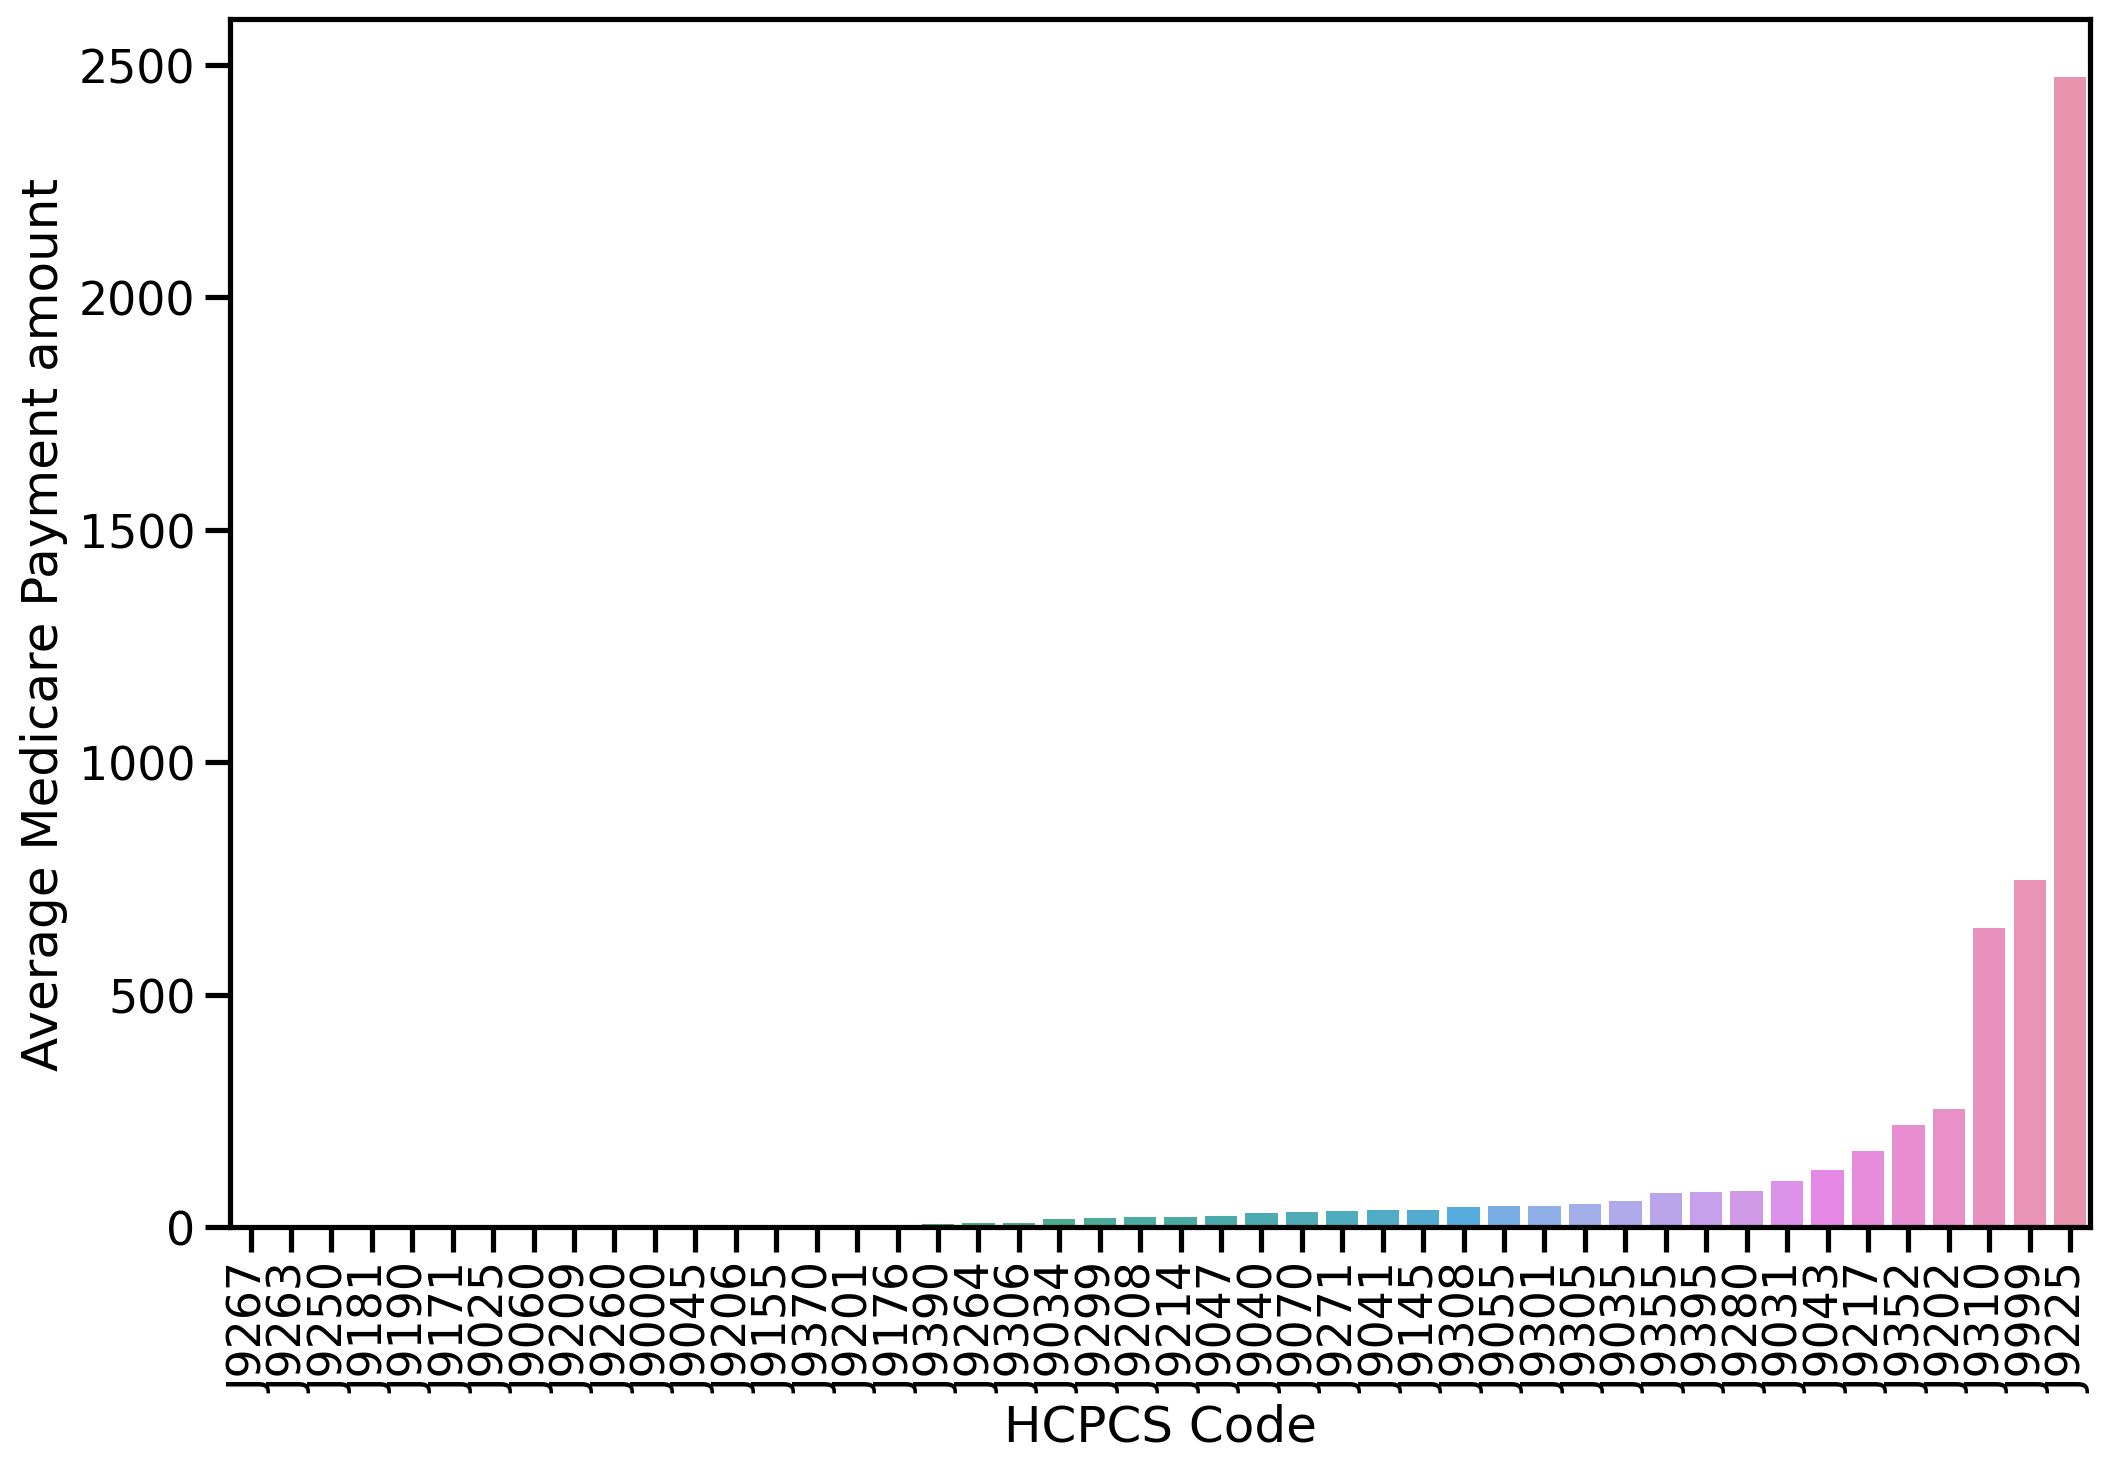

In [115]:
with sns.plotting_context("talk"):
    plt.figure(figsize = (12,8), dpi = 200)
    sns.barplot(data = hpcs_mean, x = hpcs_mean.index, y = 'average_Medicare_payment_amt')
    plt.xticks(rotation=90)
    plt.xlabel('HCPCS Code')
    plt.ylabel('Average Medicare Payment amount')

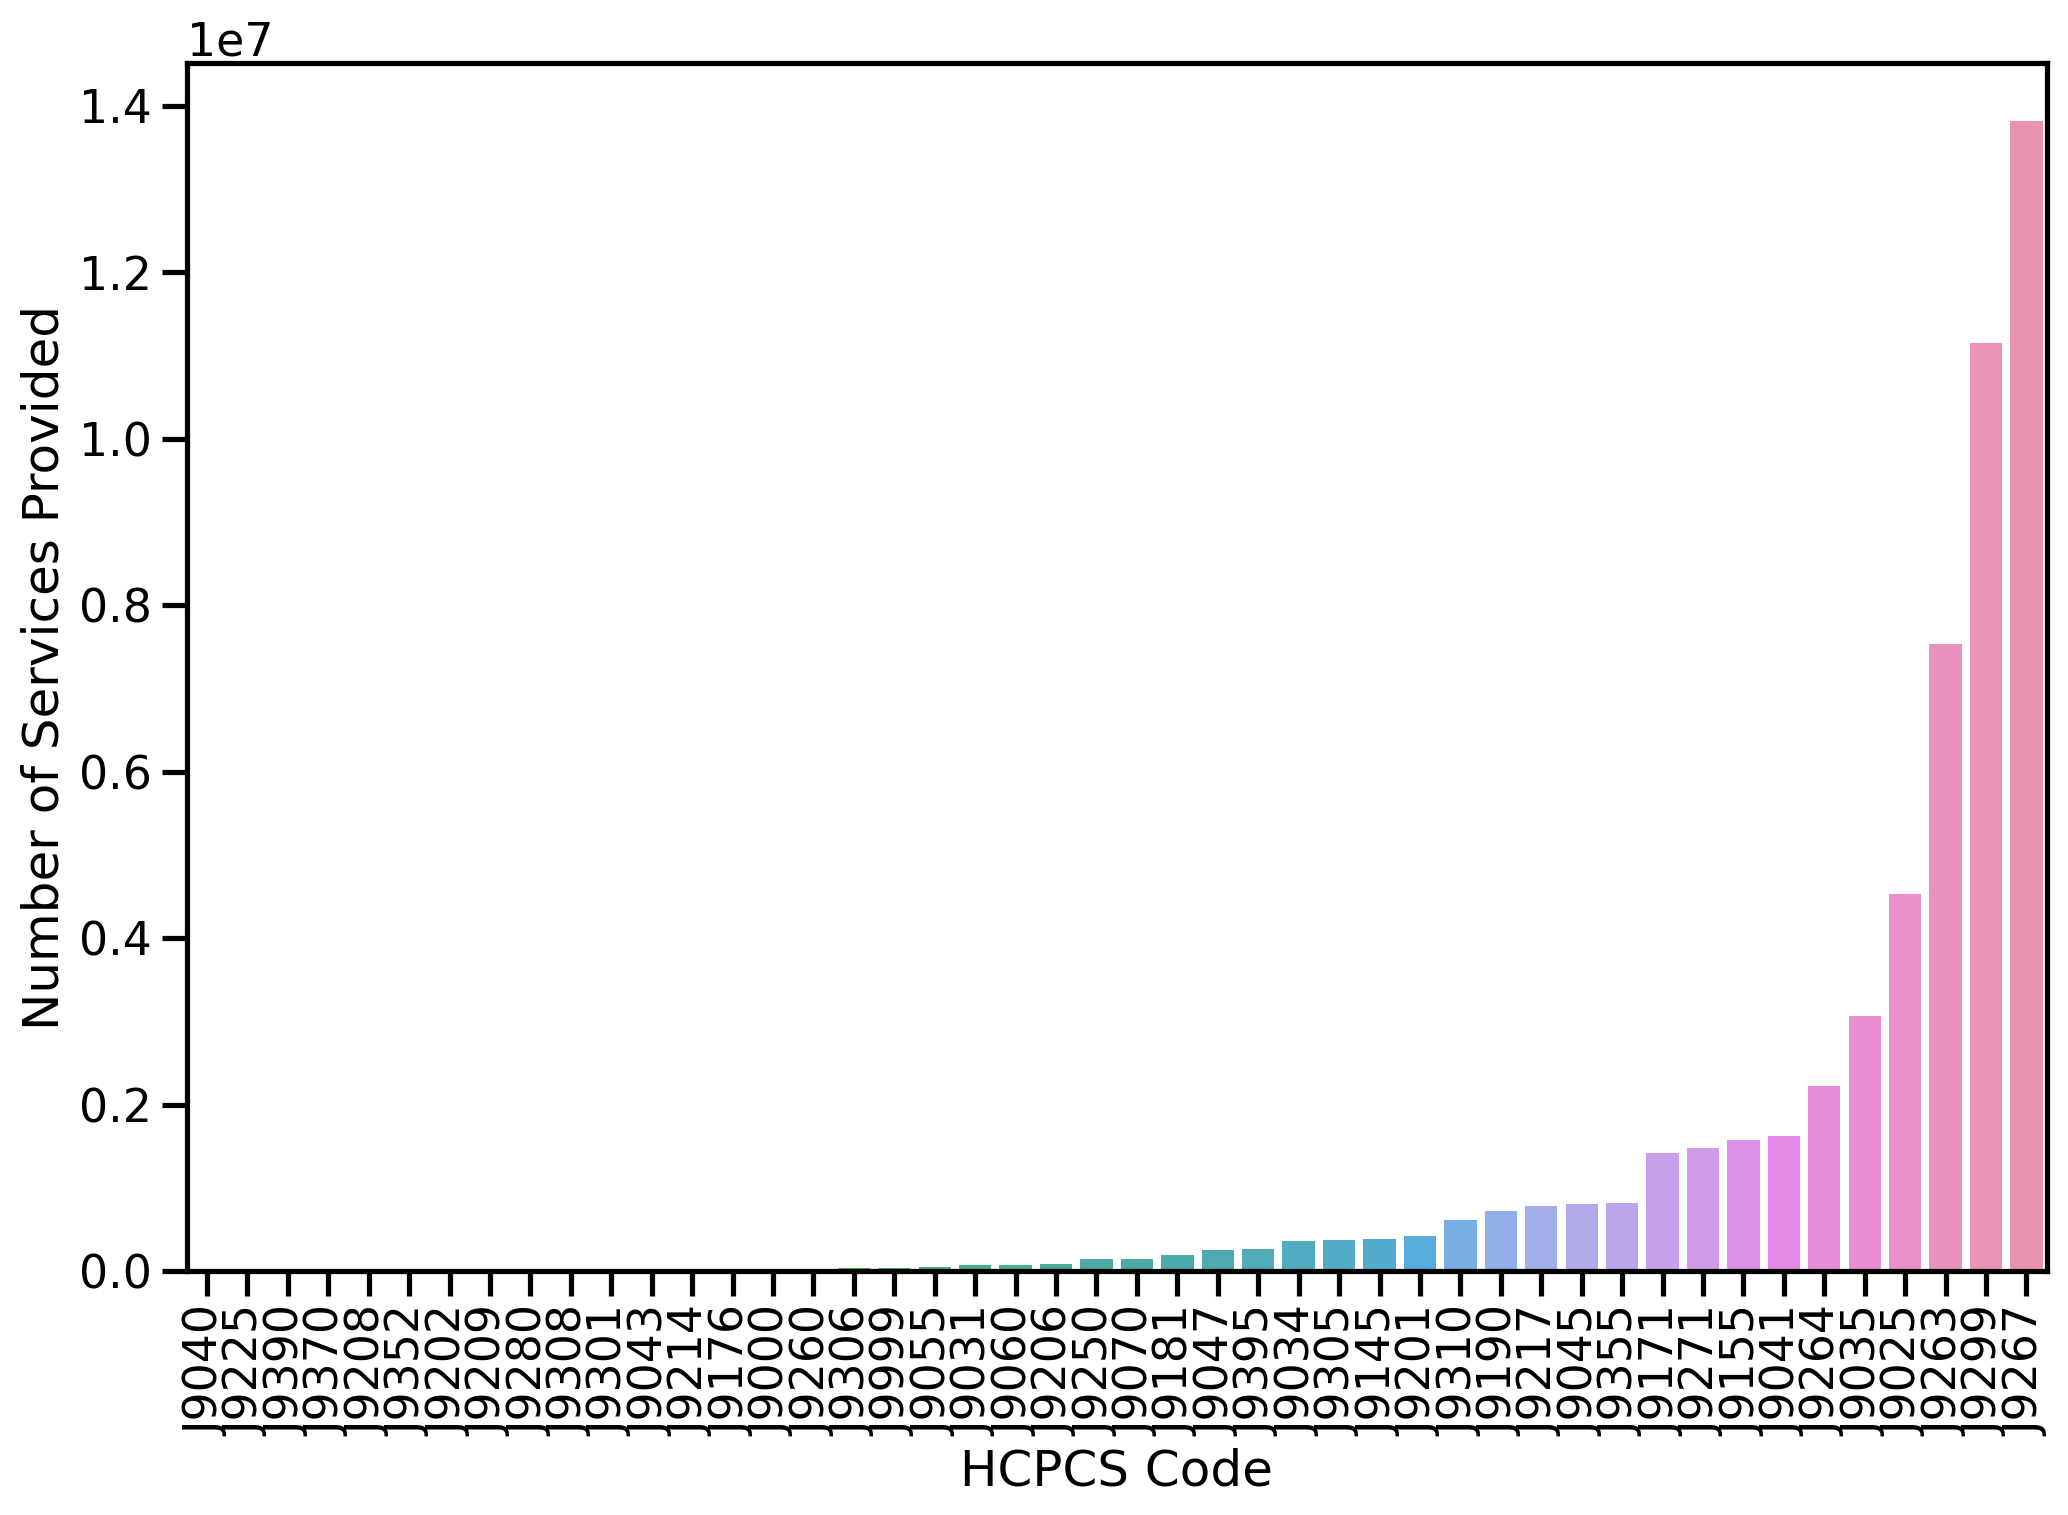

In [116]:
with sns.plotting_context("talk"):
    plt.figure(figsize = (12,8),dpi = 200)
    sns.barplot(data = hpcs_sum, x = hpcs_sum.index, y = 'line_srvc_cnt')
    plt.xticks(rotation=90)
    plt.xlabel('HCPCS Code')
    plt.ylabel('Number of Services Provided')

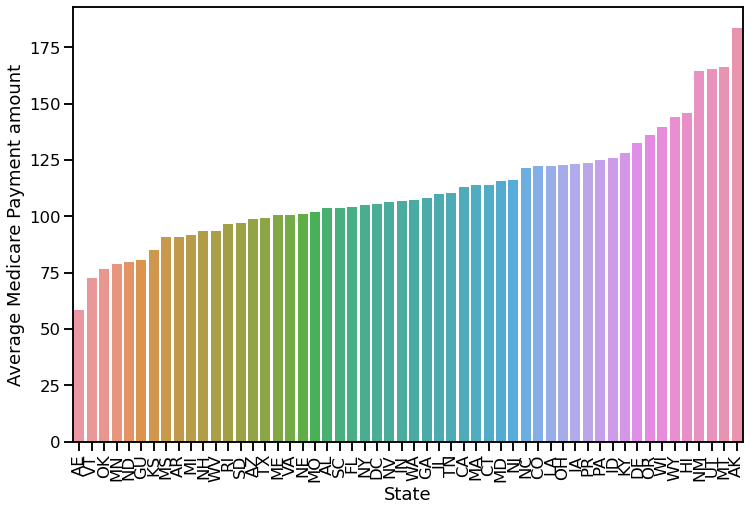

In [117]:
with sns.plotting_context("talk"):
    plt.figure(figsize = (12,8))
    sns.barplot(data = state_mean, x = state_mean.index, y = 'average_Medicare_standard_amt')
    plt.xticks(rotation=90)
    plt.xlabel('State')
    plt.ylabel('Average Medicare Payment amount')

In [118]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "notebook_connected"

fig = px.choropleth(data_frame = state_mean, locations = state_mean.index, locationmode = 'USA-states', color = 'average_Medicare_standard_amt', scope = 'usa')
fig.show()